# SPOTIFY CHARTS: TAYLOR SWIFT
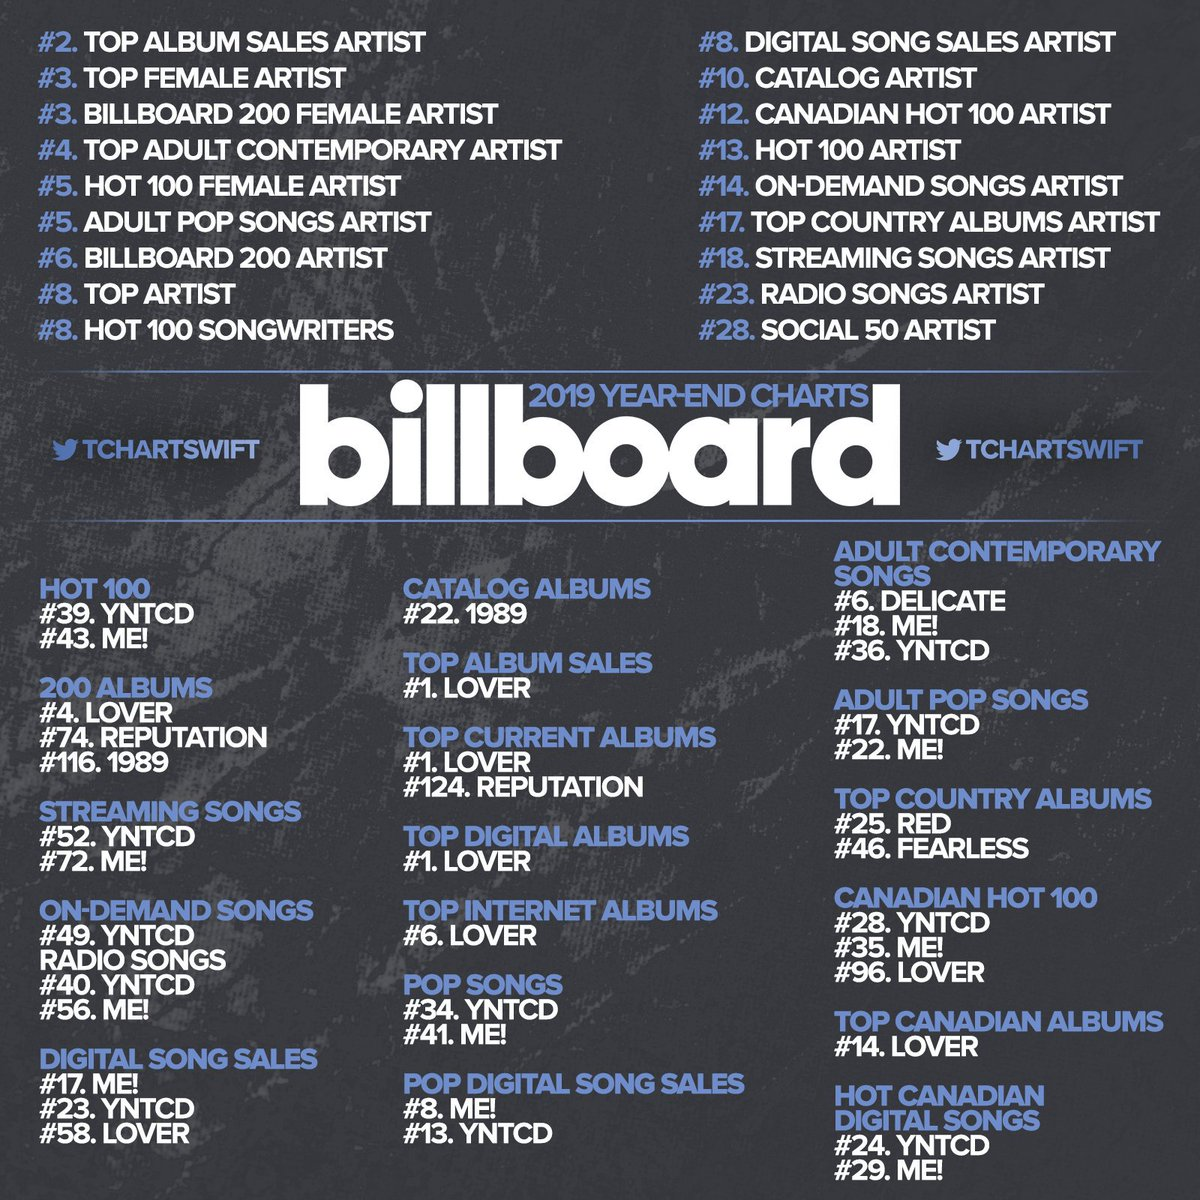

Let us first import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('spotify_taylorswift.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        171 non-null    int64  
 1   name              171 non-null    object 
 2   album             171 non-null    object 
 3   artist            171 non-null    object 
 4   release_date      171 non-null    object 
 5   length            171 non-null    int64  
 6   popularity        171 non-null    int64  
 7   danceability      171 non-null    float64
 8   acousticness      171 non-null    float64
 9   energy            171 non-null    float64
 10  instrumentalness  171 non-null    float64
 11  liveness          171 non-null    float64
 12  loudness          171 non-null    float64
 13  speechiness       171 non-null    float64
 14  valence           171 non-null    float64
 15  tempo             171 non-null    float64
dtypes: float64(9), int64(3), object(4)
memory us

In [4]:
df.head()

Unnamed: 0                                         name         album  \
0           0                                   Tim McGraw  Taylor Swift   
1           1                              Picture To Burn  Taylor Swift   
2           2  Teardrops On My Guitar - Radio Single Remix  Taylor Swift   
3           3                        A Place in this World  Taylor Swift   
4           4                                  Cold As You  Taylor Swift   

         artist release_date  length  popularity  danceability  acousticness  \
0  Taylor Swift   2006-10-24  232106          49         0.580         0.575   
1  Taylor Swift   2006-10-24  173066          54         0.658         0.173   
2  Taylor Swift   2006-10-24  203040          59         0.621         0.288   
3  Taylor Swift   2006-10-24  199200          49         0.576         0.051   
4  Taylor Swift   2006-10-24  239013          50         0.418         0.217   

   energy  instrumentalness  liveness  loudness  speechiness  valence    tempo  
0   0.491               0.0    0.1210    -6.462       0.0251    0.425   76.009  
1   0.877               0.0    0.0962    -2.098       0.0323    0.821  105.586  
2   0.417               0.0    0.1190    -6.941       0.0231    0.289   99.953  
3   0.777               0.0    0.3200    -2.881       0.0324    0.428  115.028  
4   0.482               0.0    0.1230    -5.769       0.0266    0.261  175.558

Let us check if all the values under the column instrumentalness are zero 

In [5]:
(df['instrumentalness']==0).all()

False

In [6]:
print(df['instrumentalness'].max() - df['instrumentalness'].min())

0.179


We can see that not all values are zero so we won't delete this column

In [7]:
df['instrumentalness'].mean()

0.002490323216374269

Since the artist is Taylor Swift, we can remove this column

In [8]:
df=df.drop(['artist'], axis=1)

We can also remove the index value column

In [9]:
df=df.drop(df.columns[0], axis=1)

Checking for null values

In [10]:
df.isnull().any()

name                False
album               False
release_date        False
length              False
popularity          False
danceability        False
acousticness        False
energy              False
instrumentalness    False
liveness            False
loudness            False
speechiness         False
valence             False
tempo               False
dtype: bool

no null values in the dataset

In [11]:
df.head()

name         album release_date  \
0                                   Tim McGraw  Taylor Swift   2006-10-24   
1                              Picture To Burn  Taylor Swift   2006-10-24   
2  Teardrops On My Guitar - Radio Single Remix  Taylor Swift   2006-10-24   
3                        A Place in this World  Taylor Swift   2006-10-24   
4                                  Cold As You  Taylor Swift   2006-10-24   

   length  popularity  danceability  acousticness  energy  instrumentalness  \
0  232106          49         0.580         0.575   0.491               0.0   
1  173066          54         0.658         0.173   0.877               0.0   
2  203040          59         0.621         0.288   0.417               0.0   
3  199200          49         0.576         0.051   0.777               0.0   
4  239013          50         0.418         0.217   0.482               0.0   

   liveness  loudness  speechiness  valence    tempo  
0    0.1210    -6.462       0.0251    0.425   76.009  
1    0.0962    -2.098       0.0323    0.821  105.586  
2    0.1190    -6.941       0.0231    0.289   99.953  
3    0.3200    -2.881       0.0324    0.428  115.028  
4    0.1230    -5.769       0.0266    0.261  175.558

Finding more about the popular songs

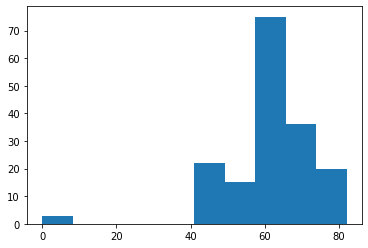

In [12]:
plt.hist(df['popularity'])
plt.show()

we can remove the 2 values of lowest popularity. From the histogram, we can infer that it will follow a normal distribution 

In [13]:
index_names= df[df['popularity']<=20].index

In [14]:
df.drop(index_names, inplace=True)

We will be plotting QQ and proability plot to confirm that popularity column follows a normal distribution

In [15]:
import statsmodels.api as sm 

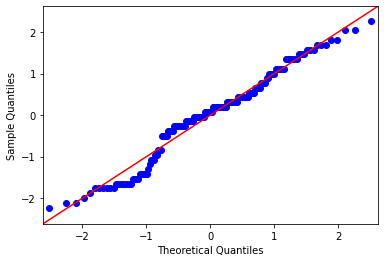

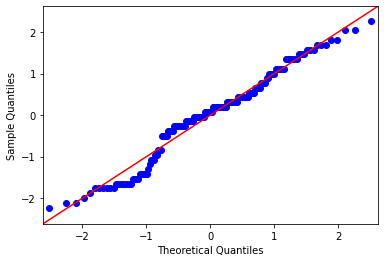

In [16]:
sm.qqplot(df['popularity'], line='45', fit=True)

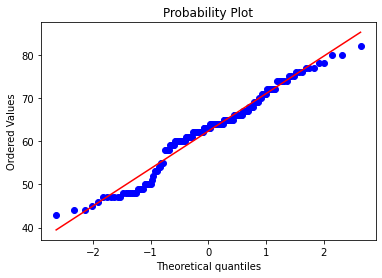

In [17]:
import scipy.stats as stats
stats.probplot(df['popularity'], dist='norm', plot=plt)
plt.show()

QQ and PP plot suggests that it follows a normal distribution

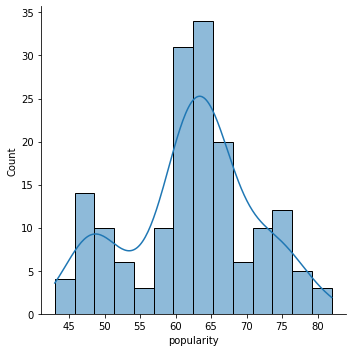

In [18]:
sns.displot(df['popularity'], kde=True)

# Album popularity

In [19]:
#we will first sort the data. We are taking the mean value of popularity for each album
sorted_df = df.groupby('album').mean().sort_values(['popularity'],ascending=False)
sorted_df=sorted_df.reset_index()  #adds index value for each entry

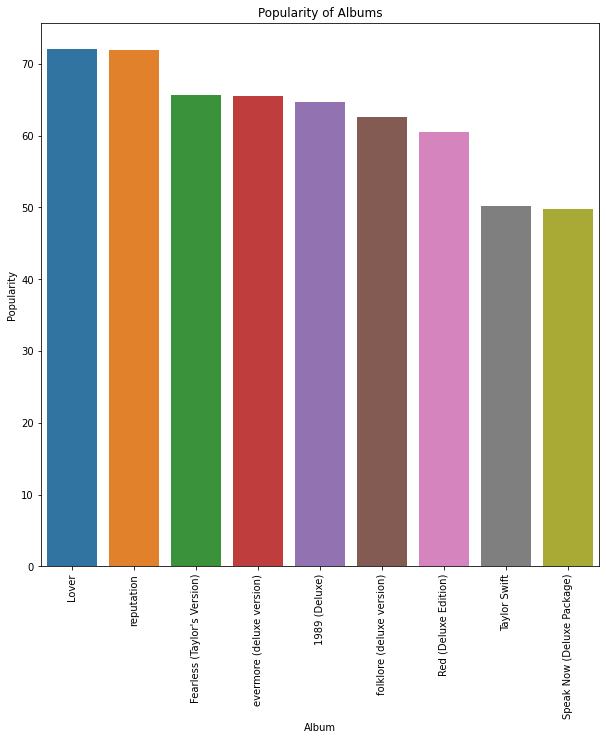

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x=sorted_df['album'], y=sorted_df['popularity'])
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.title('Popularity of Albums')
plt.show()

lover and reputation are two of the most popular albums released by Taylor
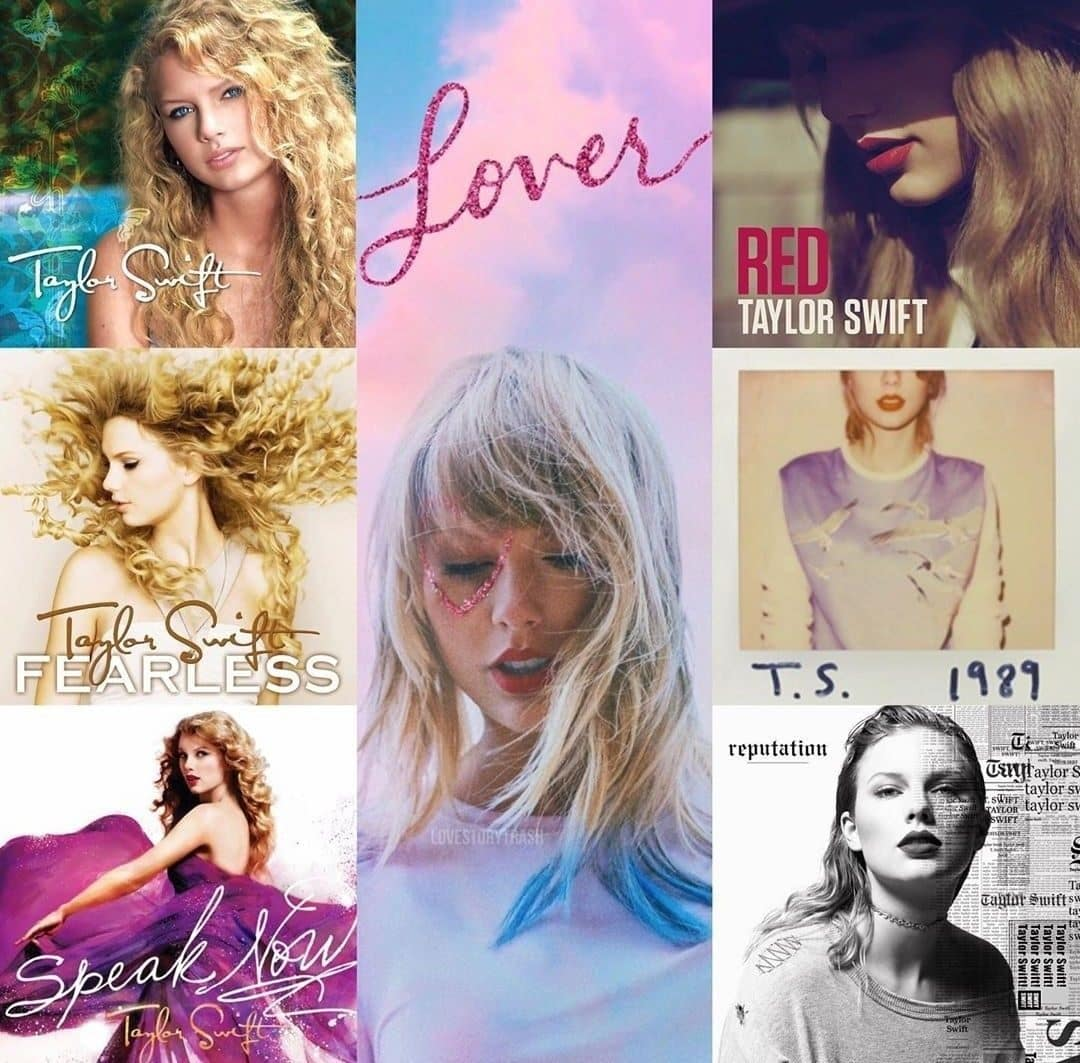   

# TOP SONGS

Finding the top 10 popular songs

In [21]:
topdf=df.nlargest(10, ['popularity'])
topdf.head()

name          album release_date  length  popularity  \
60             Blank Space  1989 (Deluxe)   2014-01-01  231826          82   
64            Shake It Off  1989 (Deluxe)   2014-01-01  219200          80   
95                   Lover          Lover   2019-08-23  221306          80   
82                Delicate     reputation   2017-11-10  232253          78   
106  You Need To Calm Down          Lover   2019-08-23  171360          78   

     danceability  acousticness  energy  instrumentalness  liveness  loudness  \
60          0.760       0.10300   0.703          0.000000    0.0913    -5.412   
64          0.647       0.06470   0.800          0.000000    0.3340    -5.384   
95          0.359       0.49200   0.543          0.000016    0.1180    -7.582   
82          0.750       0.21600   0.404          0.000357    0.0911   -10.178   
106         0.771       0.00929   0.671          0.000000    0.0637    -5.617   

     speechiness  valence    tempo  
60        0.0540   0.5700   95.997  
64        0.1650   0.9420  160.078  
95        0.0919   0.4530   68.534  
82        0.0682   0.0499   95.045  
106       0.0553   0.7140   85.026

finding out relation bw various columns of top songs

In [22]:
topdf.groupby('album')['album'].value_counts()

album          album        
1989 (Deluxe)  1989 (Deluxe)    2
Lover          Lover            5
reputation     reputation       3
Name: album, dtype: int64

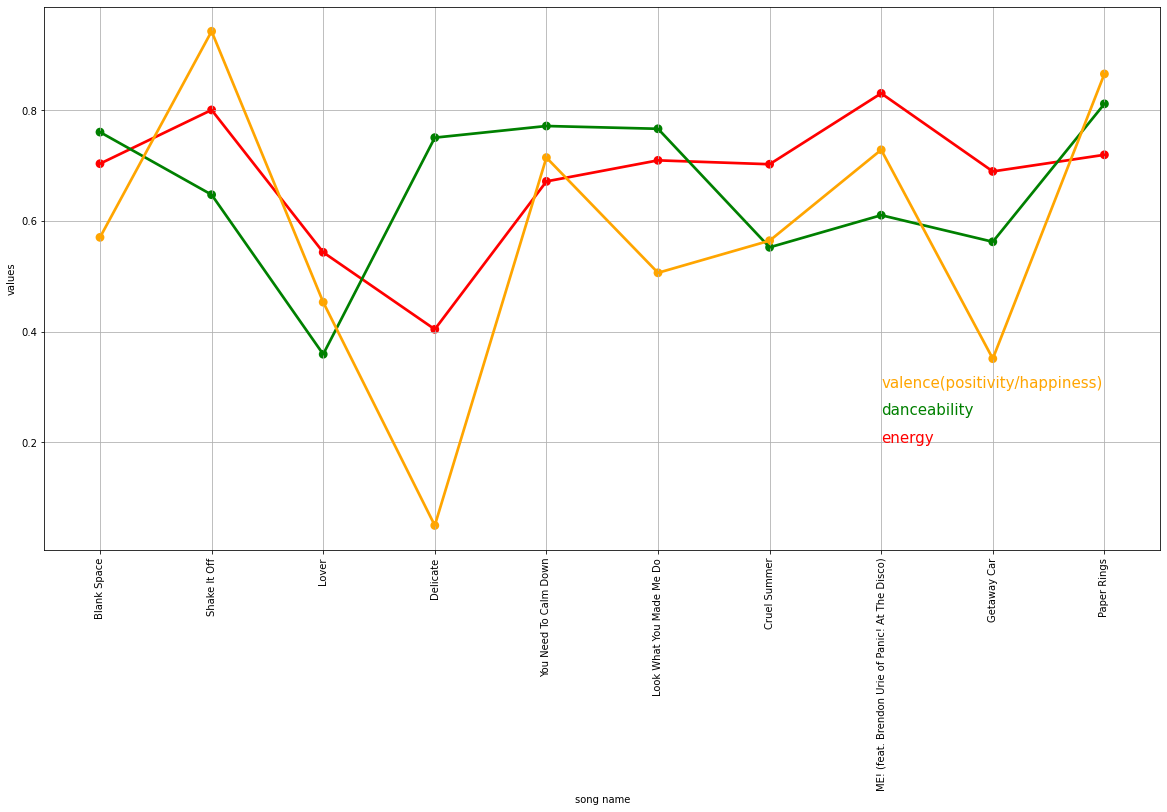

In [23]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x=topdf['name'], y=topdf['energy'], color='red')
sns.pointplot(x=topdf['name'], y=topdf['danceability'], color='green')
sns.pointplot(x=topdf['name'], y=topdf['valence'], color='orange')
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('song name')
plt.ylabel('values')
plt.text(7,0.20,'energy', color='red', fontsize=15)
plt.text(7,0.25,'danceability', color='green', fontsize=15)
plt.text(7,0.30,'valence(positivity/happiness)', color='orange', fontsize=15)
plt.show()

we can see that most of the popular songs have high danceability and are mostly from pop genre

<AxesSubplot:>

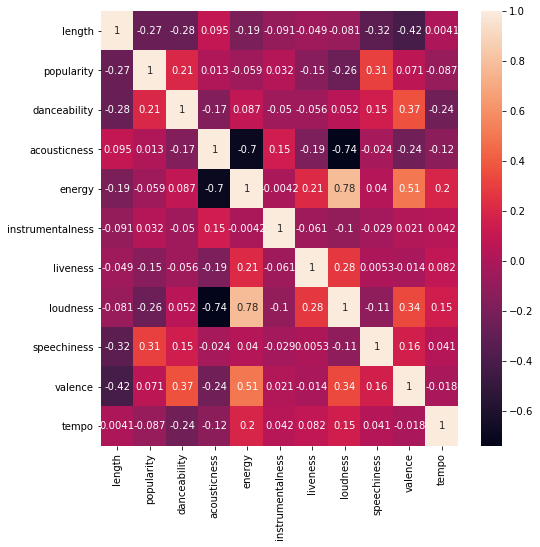

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

Clearly, energy and loudness are strongly correlated. There is a positive correlation between valence and danceability 
which suggests that happy and positive songs are more danceable.

Now, finding out the most energetic songs

In [25]:
energy_df=df.nlargest(15,['energy'])

In [26]:
energy_df.groupby('album')['name'].value_counts()

album                        name                                           
1989 (Deluxe)                I Wish You Would                                   1
                             New Romantics                                      1
                             Out Of The Woods                                   1
Fearless (Taylor's Version)  Forever & Always (Taylor’s Version)                1
                             Tell Me Why (Taylor’s Version)                     1
                             The Other Side Of The Door (Taylor’s Version)      1
Lover                        ME! (feat. Brendon Urie of Panic! At The Disco)    1
Red (Deluxe Edition)         Red                                                1
                             Red - Original Demo Recording                      1
                             State Of Grace                                     1
Speak Now (Deluxe Package)   Better Than Revenge                                1
                     

Most of the energetic songs are from the pop albums

In [27]:
#avg length of songs
df['length'].mean()/60000  #in minutes

3.9697232142857146

we can see that the album lover and reputation were Taylor's most popular ones

these are also the two albums having the highest danceability

In [28]:
df.groupby('album')['danceability'].mean()

album
1989 (Deluxe)                  0.623938
Fearless (Taylor's Version)    0.551038
Lover                          0.658222
Red (Deluxe Edition)           0.633409
Speak Now (Deluxe Package)     0.559000
Taylor Swift                   0.545267
evermore (deluxe version)      0.526824
folklore (deluxe version)      0.541941
reputation                     0.657933
Name: danceability, dtype: float64

Now, let us try to run a model to predict the popularity of songs

In [29]:
df.head()

name         album release_date  \
0                                   Tim McGraw  Taylor Swift   2006-10-24   
1                              Picture To Burn  Taylor Swift   2006-10-24   
2  Teardrops On My Guitar - Radio Single Remix  Taylor Swift   2006-10-24   
3                        A Place in this World  Taylor Swift   2006-10-24   
4                                  Cold As You  Taylor Swift   2006-10-24   

   length  popularity  danceability  acousticness  energy  instrumentalness  \
0  232106          49         0.580         0.575   0.491               0.0   
1  173066          54         0.658         0.173   0.877               0.0   
2  203040          59         0.621         0.288   0.417               0.0   
3  199200          49         0.576         0.051   0.777               0.0   
4  239013          50         0.418         0.217   0.482               0.0   

   liveness  loudness  speechiness  valence    tempo  
0    0.1210    -6.462       0.0251    0.425   76.009  
1    0.0962    -2.098       0.0323    0.821  105.586  
2    0.1190    -6.941       0.0231    0.289   99.953  
3    0.3200    -2.881       0.0324    0.428  115.028  
4    0.1230    -5.769       0.0266    0.261  175.558

In [30]:
df= df.drop(['album', 'release_date'], axis=1)

In [31]:
df=df.drop(['tempo','acousticness', 'energy', 'valence', 'instrumentalness'], axis=1)

popularity is our dependent variable; we are shifting it to the left-most side

In [32]:
pop= df.pop('popularity')

In [33]:
df.insert(0, 'popularity', pop)

In [34]:
df.head(2)

popularity             name  length  danceability  liveness  loudness  \
0          49       Tim McGraw  232106         0.580    0.1210    -6.462   
1          54  Picture To Burn  173066         0.658    0.0962    -2.098   

   speechiness  
0       0.0251  
1       0.0323

In [35]:
x= df.iloc[:,2:].values  #stores all the independent variables

In [36]:
y=df.iloc[:,0].values   #stores popularity- dependent variable

In [37]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
lr=LinearRegression()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=35)


In [40]:
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test))

0.24931995713123178


In [41]:
y_pred= lr.predict(x_test)

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.24931995713123178

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=35)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=35)

In [44]:
y_pred = regressor.predict(x_test)

In [45]:
r2_score(y_test, y_pred)


0.40229305180291386

In [46]:
print("Accuracy score (training): {0:.3f}".format(regressor.score(x_train, y_train)))
print("Accuracy score (predicted): {0:.3f}".format(regressor.score(x_test, y_test)))

Accuracy score (training): 0.893
Accuracy score (predicted): 0.402


In [47]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[69.21 71.  ]
 [64.9  60.  ]
 [65.78 65.  ]
 [69.11 64.  ]
 [62.19 63.  ]
 [64.3  66.  ]
 [64.13 48.  ]
 [59.87 72.  ]
 [58.5  54.  ]
 [60.97 76.  ]
 [65.8  75.  ]
 [69.63 68.  ]
 [56.13 44.  ]
 [57.46 62.  ]
 [54.68 48.  ]
 [59.73 50.  ]
 [68.45 77.  ]
 [72.42 76.  ]
 [63.03 60.  ]
 [67.31 65.  ]
 [68.8  65.  ]
 [51.73 47.  ]
 [66.41 65.  ]
 [57.73 48.  ]
 [64.63 62.  ]
 [58.2  49.  ]
 [63.45 64.  ]
 [66.61 66.  ]
 [62.16 62.  ]
 [63.21 74.  ]
 [66.01 68.  ]
 [75.11 78.  ]
 [60.64 61.  ]
 [69.2  62.  ]
 [71.18 77.  ]
 [59.73 65.  ]
 [58.76 64.  ]
 [60.34 61.  ]
 [71.22 74.  ]
 [71.73 70.  ]
 [52.59 52.  ]
 [71.09 60.  ]
 [65.05 68.  ]
 [70.22 68.  ]
 [63.12 46.  ]
 [61.56 47.  ]
 [62.85 47.  ]
 [66.82 65.  ]
 [60.54 62.  ]
 [63.71 64.  ]
 [61.93 62.  ]]


We can see that most of our predicted values are close to the actual values

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import datasets
  

gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1)
  
# Fit to training set
gbr.fit(x_train, y_train)
  
# Predict on test set
y_pred = gbr.predict(x_test)
  
# test set RMSE
test_rmse = MSE(y_test, y_pred) ** (1 / 2)
  
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))
r2_score(y_test, y_pred)

RMSE test set: 7.35


0.36867081244620026

In [49]:
print("Accuracy score (training): {0:.3f}".format(gbr.score(x_train, y_train)))
print("Accuracy score (predicted): {0:.3f}".format(gbr.score(x_test, y_test)))

Accuracy score (training): 0.650
Accuracy score (predicted): 0.369


We can see that Random Forest works best in this situation. Our model is not highly accurate but can still give a rough estimate about the popularity of a song on the basis of various features like loudness, danceability and liveness

Thank you!